In [1]:
# imports
# https://viewpi41rnogfvf.udacity-student-workspaces.com/notebooks/pca_basics_solution.ipynb
import pandas as pd
import numpy as np
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from zipline.pipeline.data import USEquityPricing
from quantopian.pipeline.filters import Q1500US

from quantopian.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns
from quantopian.pipeline.data import morningstar as mstar

trading_calendar = get_calendar('NYSE')

In [2]:
# Equities having a morningstar most recent market cap above $20B
have_market_cap = (mstar.valuation.market_cap.latest > 20000000000)

In [3]:
# create an empty pipeline with have_market_cap screen
pipeline = Pipeline(screen = have_market_cap)

In [4]:
# create daily returns factor
daily_ret = DailyReturns(inputs = [USEquityPricing.close])

### Add factors and filters to the pipeline
in the code below we add the daily_ret to the pipeline created above

In [5]:
# add the daily returns factor to the pipeline
pipeline.add(daily_ret, 'daily_return')

# set the starting and end dates
start_date = pd.Timestamp('2014-01-01', tz='utc')
end_date = pd.Timestamp('2019-07-26', tz='utc')

# Run our pipeline for the given start and end dates
output = run_pipeline(pipeline, start_date, end_date)

# display the pipeline output
output.head()

daily_return
2014-01-02 00:00:00+00:00 Equity(24 [AAPL])       0.012011
                          Equity(62 [ABT])       -0.001562
                          Equity(64 [GOLD])       0.029206
                          Equity(114 [ADBE])      0.005542
                          Equity(128 [ADM])      -0.006409

In [7]:
returns_df = output.daily_return.unstack().fillna(0)
returns_df

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
2014-01-02 00:00:00+00:00,0.0,0.012011,0.0,-0.001562,0.029206,0.000000,0.0,0.005542,0.000000,-0.006409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-03 00:00:00+00:00,0.0,-0.014131,0.0,-0.002608,0.039160,0.000000,0.0,-0.009855,0.000000,-0.009445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-06 00:00:00+00:00,0.0,-0.022034,0.0,0.010199,-0.009285,0.000000,0.0,-0.002024,0.000000,0.004186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-07 00:00:00+00:00,0.0,0.005377,0.0,0.013461,0.012128,0.000000,0.0,-0.017918,0.000000,0.002547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-08 00:00:00+00:00,0.0,-0.007205,0.0,-0.007663,-0.004357,0.000000,0.0,0.014802,0.000000,-0.010164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-09 00:00:00+00:00,0.0,0.006407,0.0,0.009009,-0.018600,0.000000,0.0,-0.001187,0.000000,-0.011435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-10 00:00:00+00:00,0.0,-0.012861,0.0,0.001786,-0.011706,0.000000,0.0,0.003566,0.000000,-0.004485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-13 00:00:00+00:00,0.0,-0.006673,0.0,0.007894,0.025381,0.000000,0.0,0.007445,0.000000,-0.004624,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-14 00:00:00+00:00,0.0,0.005048,0.0,-0.006352,0.000000,0.000000,0.0,-0.015536,0.000000,-0.010602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-15 00:00:00+00:00,0.0,0.020127,0.0,0.011762,-0.020902,0.000000,0.0,0.029771,0.000000,0.019263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [8]:
returns_df.shape

(1401, 673)

### Visualizing the Data
As we can see above the returns dataframe contains stock returns for 673 assets. Even though we can't make 673-dimensional plots, we can plot the data for 2 stocks at a time. This plot will then show us visually how correlated  the stock returns are for a apir of stocks.

In the code below, we use the .plot.scatter(x,y) method to make a scatter plot of returns for the returns of column X and column y. The x and y parameters are both intergers and indicate the number of columns we want ot plot. For example if we want ot see how correlated the stock of ADBE and AAPL are we can choose x = 1 and y = 7, since we can see from the dataframe above that AAPL corresponds to 1 and ADBE corresponds to 7. 

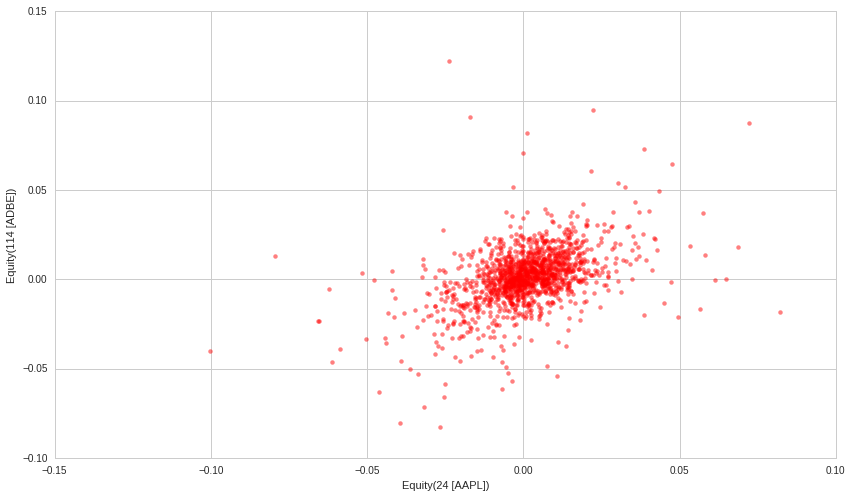

In [12]:
ax = returns_df.plot.scatter(x = 1, y = 7, grid = True, color = 'red', alpha = 0.50, linewidth = 0)
#ax.set_facecolor('lightslategray')

### Correlation of Returns
Apart from visualizing  the correlation between stocks as we did above, we can also creae a correlation dataframe that gives the correlation between every stock. In the code belwo we can accomplish this using the `.corr()` method to calculate the correlation between all pairs of stocks in our `returns_df` dataframe

In [13]:
# display the correlation between all stock paris in the returns dataframe
returns_df.corr(method = 'pearson')

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
Equity(2 [ARNC]),1.000000,0.036408,-0.001526,0.013989,-0.011401,-0.002210,-0.001417,0.016499,-0.003263,0.072420,...,-0.001940,-0.000920,-0.000936,0.000625,0.000253,0.000736,-0.000139,-0.002270,-0.000925,-0.001848
Equity(24 [AAPL]),0.036408,1.000000,0.003654,0.404139,-0.027154,0.337430,0.102683,0.449693,0.362004,0.252195,...,0.207686,0.134272,0.176361,0.053464,0.055048,0.087868,-0.015251,0.066963,0.020900,0.076685
Equity(53 [ABMD]),-0.001526,0.003654,1.000000,0.007258,-0.001042,0.000150,-0.000663,-0.001696,0.005579,0.032775,...,-0.000908,-0.000431,-0.000438,0.000293,0.000118,0.000344,-0.000065,-0.001063,-0.000433,-0.000865
Equity(62 [ABT]),0.013989,0.404139,0.007258,1.000000,-0.024560,0.282526,0.135286,0.480827,0.265910,0.326167,...,0.184963,0.061381,0.109011,-0.012150,-0.006145,0.026357,0.004054,0.036400,0.041079,0.003742
Equity(64 [GOLD]),-0.011401,-0.027154,-0.001042,-0.024560,1.000000,-0.020933,0.029007,0.002908,-0.026811,0.005395,...,0.010272,-0.092517,-0.088791,-0.030401,-0.036273,-0.025885,0.009404,-0.024810,0.019734,-0.011048
Equity(67 [ADSK]),-0.002210,0.337430,0.000150,0.282526,-0.020933,1.000000,0.029042,0.471444,0.458136,0.155337,...,0.231915,0.136810,0.213760,0.021087,0.029626,0.080266,-0.005401,0.097602,0.025573,0.057181
Equity(76 [TAP]),-0.001417,0.102683,-0.000663,0.135286,0.029007,0.029042,1.000000,0.144969,0.028785,0.153111,...,-0.000843,-0.000400,-0.000407,0.000272,0.000110,0.000320,-0.000060,-0.000986,-0.000402,-0.000803
Equity(114 [ADBE]),0.016499,0.449693,-0.001696,0.480827,0.002908,0.471444,0.144969,1.000000,0.340106,0.286019,...,0.140869,0.106112,0.138493,0.026150,0.032947,0.052398,-0.016528,0.071057,0.043182,0.043258
Equity(122 [ADI]),-0.003263,0.362004,0.005579,0.265910,-0.026811,0.458136,0.028785,0.340106,1.000000,0.177941,...,0.216025,0.200927,0.234232,0.058506,0.069890,0.158733,0.010174,0.074229,0.034890,0.147728
Equity(128 [ADM]),0.072420,0.252195,0.032775,0.326167,0.005395,0.155337,0.153111,0.286019,0.177941,1.000000,...,0.115435,0.066309,0.063589,0.042157,0.044722,0.089653,0.008419,0.033311,0.017242,0.032389


As we can see this is a better way to see how correlated the stock returns are than through visualization. By looking at the tabel we can easily spot  which pairs of stock have teh highest correlation.

In the code below, write a function `get_num_components(df, var_ret)` that takes a dataframe, df, and a value for the desired amount of variance you want to retain from the `df dtaframe, var_ret`. In this case the parameter df should be the returns_df dataframe obtained above. The parameter `var_ret`  must be a number betweeen 0 and 1. The function should  return the number of principal components you need to retain that amount of variance. To do this use Scikit-Learn's PCA() class and its `.explained_varianc_ratio_`. The funciton should also print the total amount of varaince retained.

In [14]:
# import resources
from sklearn.decomposition import PCA

def get_num_components(df, var_ret):
    if var_ret > 1 or var_ret < 0:
        print('Error')
        return 0
    
    if var_ret == 1:
        return df.shape[1]
    
    pca = PCA(n_components = df.shape[1])
    
    pca.fit(df)
    
    needed_components = 0
    
    var_sum = 0
    
    for i in range(0, df.shape[1]):
        if var_sum >= var_ret:
            print('Total Variance Retained: ', pca.explained_variance_ratio_[0:needed_components].sum())
            return needed_components
        else:
            needed_components += 1
            var_sum += pca.explained_variance_ratio_[i]
            
num_components = get_num_components(returns_df, 0.98)

print('\nNumber of Principal Components Needed: ', num_components)

('Total Variance Retained: ', 0.98000105390770542)
('\nNumber of Principal Components Needed: ', 289)


In the previous section you calculated the number of principal components needed to retian a give amount of variance. As you might notice you can greatly reduce teh dimensions of the data even if you retain a high level variance (var_ret < 0.9). 

In the code below use teh number of components needed as calculated in the above cell `num_components` to calculate by the percentage of dimensionalit reduction. For example, if the original data was 100-dimensional, and hte amunt of comonents needed to retain a certain amount of variance is 70, then we are able to reduce the data by30%

In [19]:
# calculate the percentage of dimensionality reduction
red_per = ((returns_df.shape[1] - num_components) / returns_df.shape[1]) * 100

print('We were able to reduce the dimensionality of the data by: ', red_per, 'percent')

('We were able to reduce the dimensionality of the data by: ', 0, 'percent')


In [20]:
red_per

0

In [21]:
returns_df.shape[1]

673

In [22]:
num_components

289

In [24]:
(returns_df.shape[1] - num_components) / returns_df.shape[1]* 100

0

In [29]:
(returns_df.shape[1] - num_components) / returns_df.shape[1] * 10000

0

In [30]:
print(returns_df.filter(like='MSFT').columns)

Index([Equity(5061 [MSFT])], dtype='object')


In [32]:
returns_df.get_loc(Equity(5061 [MSFT]))

AttributeError: 'DataFrame' object has no attribute 'get_loc'